Referencia: [CNN Model With PyTorch For Image Classification](https://medium.com/thecyphy/train-cnn-model-with-pytorch-21dafb918f48), by Pranjal Soni (Medium)


https://stackoverflow.com/questions/68398528/how-to-calculate-dimensions-of-first-linear-layer-of-a-cnn

https://discuss.pytorch.org/t/linear-layer-input-neurons-number-calculation-after-conv2d/28659


In [1]:
import torch
import torchvision

from   torchvision import transforms
from   torchvision.datasets import ImageFolder
from   torch.utils.data.dataloader import DataLoader
from   torch.utils.data import random_split
from   sklearn.metrics import confusion_matrix, accuracy_score

In [19]:
train_dir = "fft_train/"
test_dir  = "fft_test/"

In [ ]:
#load the train and test data
train_set = ImageFolder(train_dir,transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),transforms.ToTensor()]))

# test_set = ImageFolder(test_dir,transforms.Compose([
#     transforms.Resize((256,256)),transforms.ToTensor()]))

img,_ = train_set[0]
print('Size image: '+ str(img.shape))
print('   Classes: ',train_set.classes)

Size image: torch.Size([3, 64, 64])
   Classes:  ['IA', 'Real']


In [27]:
from cnn_utils import *
print('cnn_utils module has been loaded')

cnn_utils module has been loaded


In [62]:
#load the train and validation into batches.

batch_size = 32
val_size   = 100
train_size = len(train_set) - val_size

train_data,val_data = random_split(train_set,[train_size,val_size])
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 2, pin_memory = True)
val_dl = DataLoader(val_data, batch_size, num_workers = 2, pin_memory = True)


Length of Train Data : 875
Length of Validation Data : 100


In [29]:
class Print(nn.Module):
    def forward(self, x):
        print(x.size())
        return x

In [43]:
val = int((256*256)/4)
val

16384

In [73]:
# for reduced dataset
class CNN_Classification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(

            nn.Conv2d(3, 128, kernel_size = 6, stride = 1, padding = 0),
            nn.ReLU(),
            nn.Conv2d(128,256, kernel_size = 6, stride = 4, padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Flatten(),
            nn.Linear(12544,256),
            nn.Linear(256,128),
            nn.Linear(128,2),

            # nn.Linear(392,32),
            # nn.Linear(32,2)
        )

    def forward(self, xb):
        # print(xb.size())
        return self.network(xb)


In [67]:
# for full dataset
class CNN_Classification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(

            nn.Conv2d(3, 8, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(8,16, kernel_size = 3, stride = 2, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(16, 32, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(32,32, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Flatten(),
            nn.Linear(2048,1024),
            nn.Linear(1024,128),
            nn.Linear(128,2),
            nn.Dropout(0.25)
        )

    def forward(self, xb):
        return self.network(xb)


In [74]:
model =  CNN_Classification()
print(model)

CNN_Classification(
  (network): Sequential(
    (0): Conv2d(3, 128, kernel_size=(6, 6), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 256, kernel_size=(6, 6), stride=(4, 4))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Flatten(start_dim=1, end_dim=-1)
    (6): Linear(in_features=12544, out_features=256, bias=True)
    (7): Linear(in_features=256, out_features=128, bias=True)
    (8): Linear(in_features=128, out_features=2, bias=True)
  )
)


In [78]:
#fitting the model on training data and record the result after each epoch
num_epochs = 10
opt_func   = torch.optim.Adam
lr         = 0.0005 #0.0005
history    = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch    Train-Loss   Val-Loss    Val-Acc   Best    Time [sec]
------------------------------------------------------------------
    0      0.6879      0.7173      0.4844    ***      25.8 
    1      0.6868      0.7001      0.4844             23.6 
    2      0.6860      0.7025      0.4844             26.9 
    3      0.6866      0.7008      0.4844             24.3 
    4      0.6859      0.7024      0.4844             24.2 
    5      0.6883      0.7016      0.4844             23.5 
    6      0.6875      0.7007      0.4844             25.2 
    7      0.6870      0.7024      0.4844             26.0 
    8      0.6880      0.7009      0.4844             23.6 
    9      0.6879      0.7013      0.4844             22.8 
------------------------------------------------------------------
Best model saved best_model.pt (val_acc = 0.4844 in epoch =   0)
Last model saved last_model.pt (val_acc = 0.4844 in epoch =   9)
------------------------------------------------------------------
Traini

In [17]:
#fitting the model on training data and record the result after each epoch
num_epochs = 50
opt_func   = torch.optim.Adam
lr         = 0.0005
history    = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch    Train-Loss   Val-Loss    Val-Acc   Best    Time [sec]
------------------------------------------------------------------
    0      0.6957      0.6905      0.6100    ***      11.0 
    1      0.6914      0.6752      0.6100             10.7 
    2      0.6877      0.6749      0.6100             11.0 
    3      0.6926      0.6877      0.6100             10.6 
    4      0.6888      0.6765      0.6100             11.1 
    5      0.6922      0.6776      0.6100             10.6 
    6      0.6901      0.6819      0.6100             11.4 
    7      0.6886      0.6744      0.6100             10.8 
    8      0.6860      0.6755      0.6100             13.7 
    9      0.6874      0.6751      0.6100             12.1 
   10      0.6856      0.6766      0.6100             12.9 
------------------------------------------------------------------
*** Early stop after 10 epochs with no improvement
------------------------------------------------------------------
Best model saved best_mod

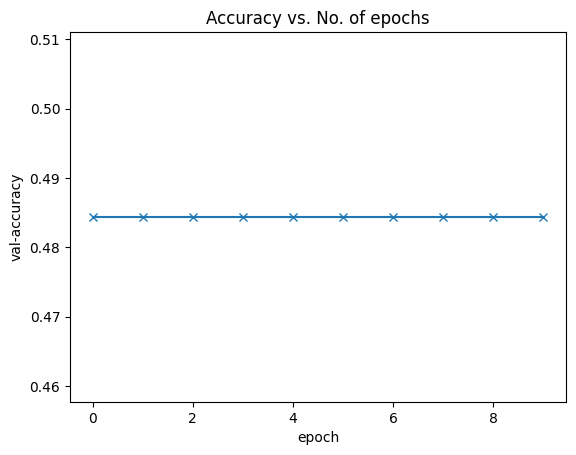

In [79]:
plot_accuracies(history)

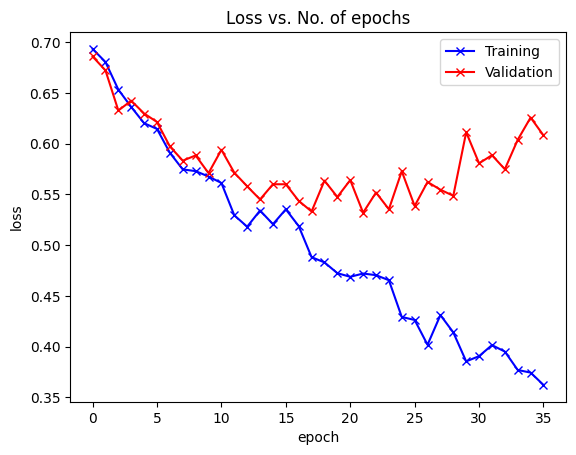

In [18]:
plot_losses(history)

In [19]:
model = load_model(CNN_Classification,'best_model.pt')

best_model.pt loaded.


In [20]:
ytest = get_labels(model,test_set)
ypred = get_prediction(model,test_set)

acc   = accuracy_score(ytest,ypred)
C     = confusion_matrix(ytest,ypred)

print('Performance on Testing subset:')
print('Accuracy:')
print(acc)
print(' ')
print('Confusion Matrix = ')
print(C)

Performance on Testing subset:
Accuracy:
0.7682317682317682
 
Confusion Matrix = 
[[402  99]
 [133 367]]


In [21]:
C1,acc1 = performance(model,train_data,'Training')
C2,acc2 = performance(model,val_data,'Validation')
C3,acc3 = performance(model,test_set,'Testing')

Training Confusion Matrix = 
[[1402  199]
 [ 296 1303]]
 
Training Accuracy = 0.8453
 
Validation Confusion Matrix = 
[[306  93]
 [107 294]]
 
Validation Accuracy = 0.7500
 
Testing Confusion Matrix = 
[[402  99]
 [133 367]]
 
Testing Accuracy = 0.7682
 
